# Education in Iraq - IHSES data

Latest update: September 2023, JW

Data available from: https://microdata.worldbank.org/index.php/catalog/2334

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

## Dataframe: merge and overview

In [2]:
ihses_hh = pd.read_stata('Documents/Data Science/data/IRQ_2012_IHSES_v02_M_CSV/2012ihses01_household_roster.dta')
ihses_edu = pd.read_stata('Documents/Data Science/data/IRQ_2012_IHSES_v02_M_CSV/2012ihses05_education.dta')

In [3]:
ihses_hh.head()

,questid,stratum,weight,weight_s7_adult,weight_s21,weight_s24,governorate,qhada,cluster,hh,...,q0106,q0107,q0108,q0109,q0110,q0111,q0112,q0113,q0114,q0115
0,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,NaN,NaN,YES,NaN,YES,1.0,NaN,YES,2.0,NaN
1,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,MARRIED,1.0,YES,NaN,DIED,NaN,"NO CERTIFICATE, ILLITERATE",DIED,NaN,"NO CERTIFICATE, ILLITERATE"
2,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,NaN,NaN,YES,NaN,YES,1.0,NaN,YES,2.0,NaN
3,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,MARRIED,2.0,YES,NaN,NO,NaN,BACHELOR DEGREE,NO,NaN,"NO CERTIFICATE, ILLITERATE"
4,110100011,1101,221.348129,618.391296,677.345459,703.013306,DUHOK,01,1,1,...,NaN,NaN,YES,NaN,YES,1.0,NaN,YES,2.0,NaN


In [4]:
ihses_edu.head()

,questid,stratum,weight,weight_s7_adult,weight_s21,weight_s24,governorate,qhada,cluster,hh,...,q0516_2,q0516_3,q0516_4,q0517_1,q0517_2,q0517_3,q0518_1,q0518_2,q0518_3,q0519
0,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,Chatting,NaN,NaN,Communicate with relatives and friends,NaN,NaN,4.0
4,110100011,1101,221.348129,618.391296,677.345459,703.013306,Duhok,01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Merge dataframes

In [5]:
ihses = pd.merge(ihses_hh, ihses_edu, on=['questid', 'idcode'])

In [6]:
# keep individuals born between 1947 and 1996
ihses = ihses.loc[ihses['q0103y'].isin([*range(1947, 1997)]), ['weight_x', 'governorate_x', 'q0102', 'q0103y', 'q0104', 'q0502', 'q0503', 'q0505', 'q0506']].copy()

In [7]:
ihses.head()

,weight_x,governorate_x,q0102,q0103y,q0104,q0502,q0503,q0505,q0506
1,221.348129,DUHOK,FEMALE,1982.0,29.0,"Yes, in the past",Diploma from an institution,NaN,NaN
3,221.348129,DUHOK,MALE,1972.0,39.0,"Yes, in the past",Diploma from an institution,NaN,NaN
5,221.348129,DUHOK,FEMALE,1991.0,20.0,"Yes, currently attending",NaN,NaN,NaN
6,221.348129,DUHOK,FEMALE,1987.0,24.0,"Yes, currently attending",NaN,NaN,NaN
7,221.348129,DUHOK,FEMALE,1996.0,16.0,"Yes, currently attending",NaN,NaN,NaN


In [8]:
ihses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93070 entries, 1 to 176040
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   weight_x       93070 non-null  float64 
 1   governorate_x  93070 non-null  category
 2   q0102          93070 non-null  category
 3   q0103y         93070 non-null  float64 
 4   q0104          93070 non-null  float64 
 5   q0502          93070 non-null  category
 6   q0503          63498 non-null  category
 7   q0505          55355 non-null  category
 8   q0506          17961 non-null  category
dtypes: category(6), float64(3)
memory usage: 3.4 MB


## Data preparation

### Sociodemographic information

In [9]:
# gender
ihses['gender'] = ihses['q0102'].str.lower()
ihses['gender'].value_counts()

female    47733
male      45337
Name: gender, dtype: int64

In [10]:
# age
ihses['age'] = ihses['q0104']
ihses['age'].describe()

count    93070.000000
mean        32.453347
std         12.979383
min         15.000000
25%         21.000000
50%         30.000000
75%         41.000000
max         65.000000
Name: age, dtype: float64

In [11]:
# age group

bins = [15, 25, 35, 45, 55, 65]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64']

ihses['age_group'] = pd.cut(ihses['age'], bins=bins, labels=labels)

ihses['age_group'].value_counts()

15-24    33834
25-34    23400
35-44    17514
45-54     9490
55-64     7187
Name: age_group, dtype: int64

In [12]:
# birth year

ihses['byear'] = ihses['q0103y']
ihses['byear'] = ihses['byear'].astype('int')
ihses['byear'] = ihses['byear']

ihses['byear'].value_counts()

1996    3972
1994    3865
1995    3815
1993    3741
1990    3542
1992    3430
1991    3219
1989    3173
1988    2923
1987    2783
1985    2680
1986    2667
1983    2523
1982    2468
1984    2463
1980    2308
1979    2268
1981    2261
1978    2113
1972    1994
1976    1992
1975    1973
1977    1896
1974    1894
1970    1834
1973    1818
1971    1710
1969    1606
1968    1553
1967    1418
1966    1333
1965    1301
1964    1246
1962    1104
1963    1093
1955    1044
1954     984
1956     853
1957     846
1952     836
1960     831
1953     824
1950     780
1961     776
1951     730
1959     584
1947     580
1949     576
1958     480
1948     367
Name: byear, dtype: int64

In [13]:
# birth year (3 year groups)

ihses['byear3'] = ihses['q0103y']/3
ihses['byear3'] = ihses['byear3'].astype('int')
ihses['byear3'] = ihses['byear3']*3

ihses['byear3'].value_counts()

1992    11036
1989     9934
1986     8373
1995     7787
1983     7666
1980     7037
1977     6277
1974     5859
1971     5522
1968     4993
1965     4052
1962     3443
1953     2852
1950     2346
1959     2191
1956     2179
1947     1523
Name: byear3, dtype: int64

In [14]:
# region
ihses['region'] = ihses['governorate_x'].str.title()
ihses['region'].value_counts()

Sulaimaniya      9934
Baghdad          7693
Nainawa          7240
Anbar            7208
Salah Al-Deen    6715
Erbil            6070
Basrah           5757
Duhok            5469
Maysan           5411
Wasit            5222
Diyala           4235
Thi-Qar          3857
Muthanna         3741
Babylon          3390
Qadisiya         3299
Kirkuk           3130
Najaf            2583
Kerbela          2116
Name: region, dtype: int64

### Educational attainment

In [15]:
# ever attended school?
ihses['q0502'].value_counts()

Yes, in the past                    63496
No, i have never enrolled before    17962
Yes, currently attending            11612
Name: q0502, dtype: int64

In [16]:
# highest educational level (individual)
ihses['q0503'].value_counts()

No certificate                 23313
Elementary                     22490
Intermediate (mid school)       5827
Diploma from an institution     4341
Bachelor degree                 3523
Preparatory                     2563
Vocational                       843
Basic                            322
Master degree                    113
Postgraduate diploma              62
Other                             55
Phd (doctorate)                   46
Name: q0503, dtype: int64

In [17]:
# join information from columns q0502 and q0503

ihses.loc[ihses['q0502']=='No, i have never enrolled before', 'edulevel'] = 0
ihses.loc[ihses['q0503']=='No certificate', 'edulevel'] = 0
ihses.loc[ihses['q0503']=='Elementary', 'edulevel'] = 1
ihses.loc[ihses['q0503']=='Intermediate (mid school)', 'edulevel'] = 2
ihses.loc[ihses['q0503']=='Preparatory', 'edulevel'] = 3
ihses.loc[ihses['q0503']=='Vocational', 'edulevel'] = 3
ihses.loc[ihses['q0503']=='Bachelor degree', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Diploma from an institution', 'edulevel'] = 4
# ihses.loc[ihses['q0503']=='Basic', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Master degree', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Postgraduate diploma', 'edulevel'] = 4
ihses.loc[ihses['q0503']=='Phd (doctorate)', 'edulevel'] = 4

# map values to educational variable
edumap = {0:'no education', 1:'primary', 2:'lower secondary', 3:'upper secondary', 4:'higher'}
ihses['edulevel'] = ihses['edulevel'].map(edumap)

ihses['edulevel'].value_counts()

no education       41273
primary            22490
higher              8085
lower secondary     5827
upper secondary     3406
Name: edulevel, dtype: int64

### Reasons for no/low education

In [18]:
# main reason for low education
ihses['q0505'].value_counts()

I have to work to support my family                                      13794
Social reasons                                                           12245
Doesn't want to                                                          11380
Hh could not afford schools expenses                                     4319
There is no easily accessible school in my neighbourhood                  3873
Household chores                                                          2492
Early marriage                                                            2253
Other (specify: ___________)                                              1511
Going to school is hazardous                                              1045
Sickness or disability                                                     609
School time is not flexible                                                573
My household thought that education is not useful to get a better job      564
Teaching is not good and serious enough to encourage

In [19]:
# main reason for no education
ihses['q0506'].value_counts()

Social reasons                                                           5865
There is no easily accessible school in my neighbourhood                 5777
I am not interested to go to school                                      1337
I have to work to support my family                                      1187
Hh could not afford schools expenses                                    1120
I have to work in the household                                           816
Sickness or disability                                                    677
My household thought that education is not useful to get a better job     401
Early marriage                                                            217
Going to school is hazardous                                              194
School time is not flexible                                               117
Other (specify: ___________)                                              111
Teaching is not serious enough to encourage enrollment          

In [20]:
# join information from columns q0505 and q0506

ihses['reason'] = np.where(ihses['q0505'].isnull(), ihses['q0506'], ihses['q0505'])

# group categories with too few observations as 'other'
ihses.loc[ihses['reason']=='Still too young', 'reason'] = 'Other'
ihses.loc[ihses['reason']=='Mistreatment of the teacher/ instructor/ professor', 'reason'] = 'Other'
ihses.loc[ihses['reason']=='Teaching is not good and serious enough to encourage continuity', 'reason'] = 'Other'
ihses.loc[ihses['reason']=='Teaching is not serious enough to encourage enrollment', 'reason'] = 'Other'
ihses.loc[ihses['reason']=='School time is not flexible', 'reason'] = 'Other'

# shorten labels
ihses.loc[ihses['reason']=='Other (specify: ___________)', 'reason'] = 'Other'
ihses.loc[ihses['reason']=='My household thought that education is not useful to get a better job', 'reason'] = 'Education is not useful'
ihses.loc[ihses['reason']=='There is no easily accessible school in my neighbourhood', 'reason'] = 'No accessible school in neighbourhood'
ihses.loc[ihses['reason']=='I have to work in the household', 'reason'] = 'Household chores'
ihses.loc[ihses['reason']=='I am not interested to go to school', 'reason'] = 'Not interested to go to school'
ihses.loc[ihses['reason']=="Doesn't want to", 'reason'] = 'Not interested to go to school'
ihses.loc[ihses['reason']=='Hh could not afford schools expenses', 'reason'] = 'Could not afford school'
ihses.loc[ihses['reason']=='I have to work to support my family', 'reason'] = 'Have to work'

ihses['reason'].value_counts(normalize=True)

Social reasons                           0.247013
Have to work                             0.204335
Not interested to go to school           0.173455
No accessible school in neighbourhood    0.131622
Could not afford school                  0.074186
Household chores                         0.045120
Other                                    0.042978
Early marriage                           0.033690
Sickness or disability                   0.017541
Going to school is hazardous             0.016899
Education is not useful                  0.013162
Name: reason, dtype: float64

### Design Weights

In [21]:
ihses['weight_x'].describe()

count    93070.000000
mean       199.852241
std        237.380463
min          4.995210
25%         63.103989
50%        124.717621
75%        225.547058
max       1469.055420
Name: weight_x, dtype: float64

## Data visualization

In [22]:
plt.style.use('ggplot')

### 1. Educational attainment

#### Educational attainment: total and by gender

In [23]:
# relative frequencies: total

ihses['total'] = 'total'

pct_edu_total = pd.crosstab(index=ihses['total'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_total

edulevel,higher,lower secondary,no education,primary,upper secondary
total,,,,,
total,13.05614,9.217011,43.517856,28.719826,5.489166


In [24]:
# relative frequencies by gender

pct_edu_gender = pd.crosstab(index=ihses['gender'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_gender

edulevel,higher,lower secondary,no education,primary,upper secondary
gender,,,,,
female,10.147869,7.869833,51.887807,26.109167,3.985324
male,16.311676,10.725050,34.148484,31.642214,7.172576


In [25]:
# concatenate aggregate tables

pct_edu = pd.concat([pct_edu_total, pct_edu_gender])

pct_edu = pct_edu.reindex(['no education','primary','lower secondary','upper secondary','higher'], 
     axis='columns')

pct_edu

edulevel,no education,primary,lower secondary,upper secondary,higher
total,43.517856,28.719826,9.217011,5.489166,13.056140
female,51.887807,26.109167,7.869833,3.985324,10.147869
male,34.148484,31.642214,10.725050,7.172576,16.311676


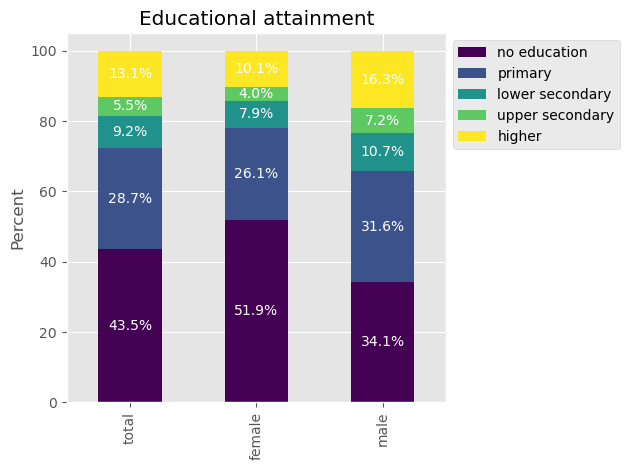

In [26]:
fig = pct_edu.plot.bar(stacked=True, colormap='viridis')

for bar in fig.containers:
    fig.bar_label(bar, label_type='center', color='white', fmt='%.1f%%')
    
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_ylabel('Percent')
fig.set_title('Educational attainment')

plt.tight_layout()
plt.savefig('fig7_educational_attainment_adults.png')

#### Educational attainment by birthyear

In [27]:
# relative frequencies by birth year

pct_edu_byear = pd.crosstab(index=ihses['byear'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_byear = pct_edu_byear.reindex(['no education','primary','lower secondary','upper secondary','higher'], 
     axis='columns')

pct_edu_byear

edulevel,no education,primary,lower secondary,upper secondary,higher
byear,,,,,
1947,63.571608,16.564862,3.621368,5.248494,10.993669
1948,57.028406,15.977639,6.658243,5.652734,14.682979
1949,65.432899,14.047310,5.874386,5.410031,9.235374
1950,68.816109,13.282907,7.449868,3.277944,7.173172
1951,56.933545,21.284130,8.100267,2.210476,11.471581
1952,59.124629,16.588164,6.151452,3.400711,14.735044
1953,62.466648,16.376756,6.308854,1.982080,12.865662
1954,61.673265,17.263111,5.905225,3.471854,11.686545
1955,57.408893,19.353279,7.352918,4.424645,11.460265


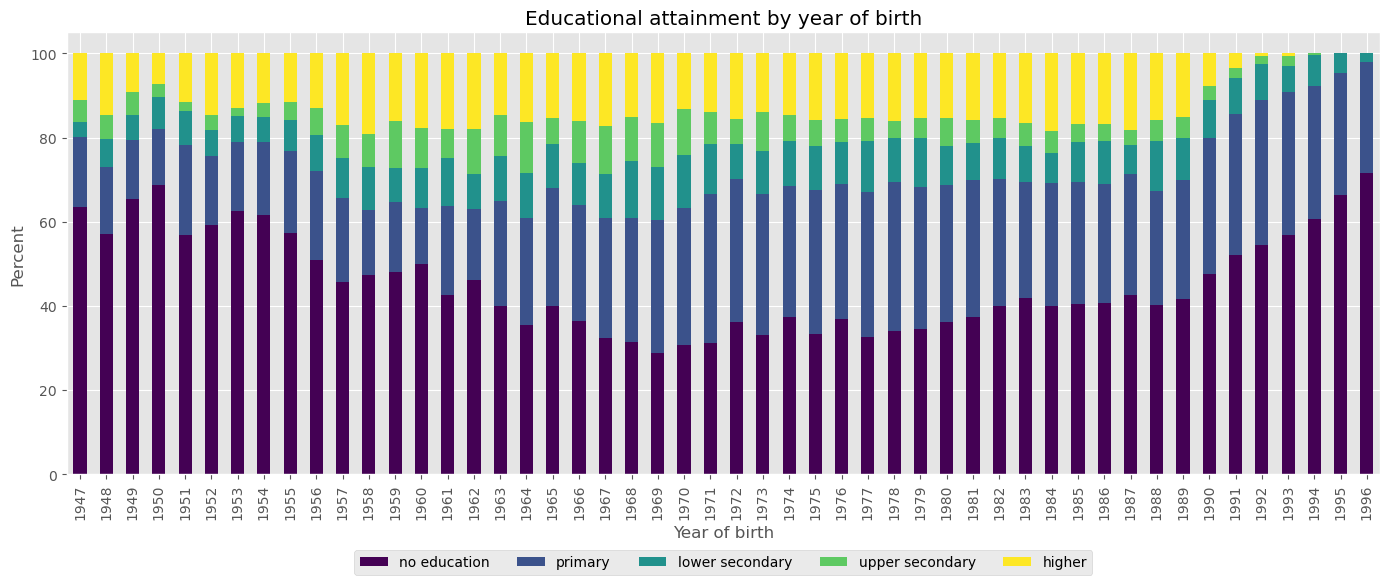

In [28]:
pct_edu_byear.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 6))

plt.legend(bbox_to_anchor=(0.5, -0.2), loc='center', ncol=5)
plt.xlabel('Year of birth')
plt.ylabel('Percent')
plt.title('Educational attainment by year of birth')

plt.tight_layout()
plt.savefig('fig7_educational_attainment_byear.png')

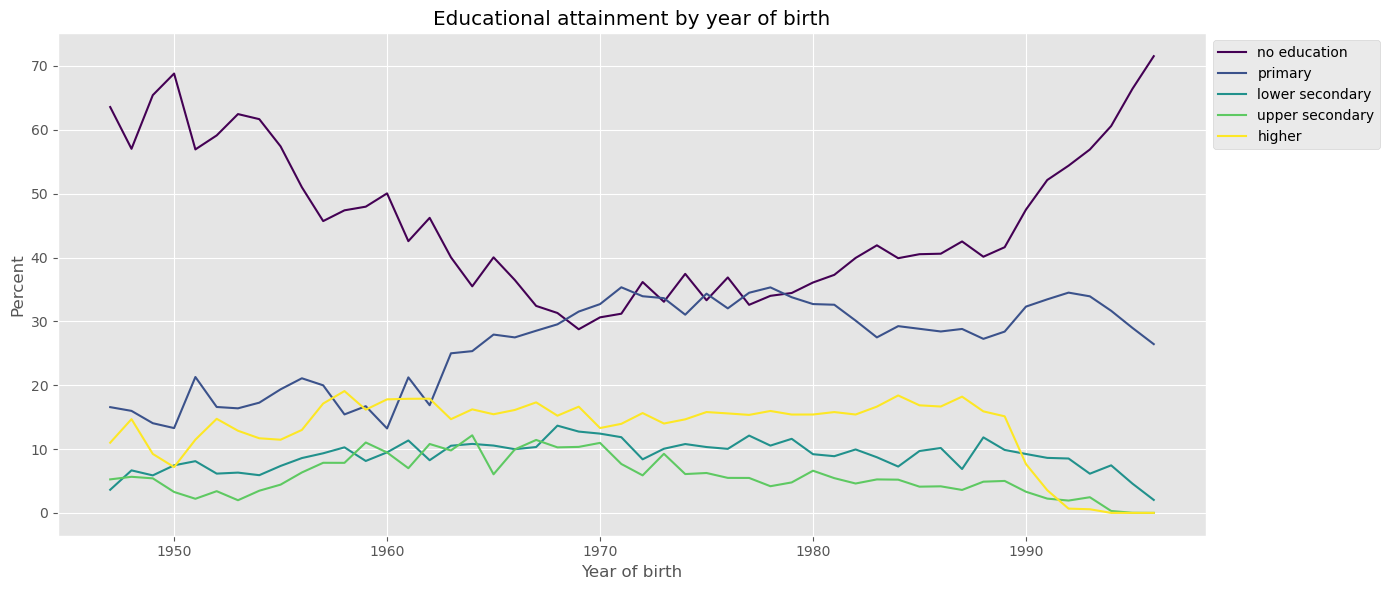

In [29]:
# alternative figure by birthyear
fig = pct_edu_byear.plot(colormap='viridis', figsize=(14,6))
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_ylabel('Percent')
fig.set_xlabel('Year of birth')
fig.set_title('Educational attainment by year of birth')

plt.tight_layout()
plt.savefig('fig7_educational_attainment_byear_t.png')

#### Educational attainment by region

In [30]:
# relative frequencies by region
pct_edu_region = pd.crosstab(index=ihses['region'], columns=ihses['edulevel'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_edu_region.reset_index(inplace=True)

In [31]:
pcode = ['IQG01', 'IQG07', 'IQG08', 'IQG02', 'IQG10', 'IQG09', 'IQG11', 'IQG12', 'IQG13', 
                       'IQG14', 'IQG03', 'IQG15', 'IQG04', 'IQG05', 'IQG16', 'IQG06', 'IQG17', 'IQG18']

pct_edu_region['pcode'] = pcode

pct_edu_region

edulevel,region,higher,lower secondary,no education,primary,upper secondary,pcode
0,Anbar,11.337107,9.337477,42.213837,31.546795,5.564784,IQG01
1,Babylon,12.922843,8.660148,37.696980,34.782254,5.937775,IQG07
2,Baghdad,17.176775,14.356864,30.802871,29.496170,8.167320,IQG08
3,Basrah,12.081578,9.827738,41.411069,32.158145,4.521470,IQG02
4,Diyala,15.063452,10.125069,32.294934,36.723050,5.793494,IQG10
5,Duhok,10.221034,5.476757,59.946757,20.174514,4.180938,IQG09
6,Erbil,15.332155,5.604973,52.933177,20.553901,5.575795,IQG11
7,Kerbela,14.178468,11.478370,41.412543,27.416649,5.513970,IQG12
8,Kirkuk,11.863403,5.817061,43.604128,34.131309,4.584099,IQG13
9,Maysan,9.466045,6.675277,56.013476,24.574175,3.271027,IQG14


In [32]:
# shapefile
map_df = gpd.read_file('Documents/Data Science/data/irq-administrative-divisions-shapefiles/irq_admbnda_adm1_cso_20190603.shx')

In [33]:
#merge dataframes
df_merged = map_df.merge(pct_edu_region, left_on=['ADM1_PCODE'], right_on=['pcode'])

In [34]:
df_merged.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,validOn,validTo,geometry,region,higher,lower secondary,no education,primary,upper secondary,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,NaN,NaN,NaN,NaN,NaN,...,2019-06-03,NaN,"POLYGON ((41.27872 35.14914, 41.30727 35.14842...",Anbar,11.337107,9.337477,42.213837,31.546795,5.564784,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,NaN,NaN,NaN,NaN,NaN,...,2019-06-03,NaN,"POLYGON ((47.66124 31.26825, 47.66724 31.26725...",Basrah,12.081578,9.827738,41.411069,32.158145,4.521470,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,NaN,NaN,NaN,NaN,NaN,...,2019-06-03,NaN,"POLYGON ((45.24242 31.74129, 45.24884 31.74048...",Muthanna,7.867569,5.535075,62.864362,20.105207,3.627788,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,NaN,NaN,NaN,NaN,NaN,...,2019-06-03,NaN,"POLYGON ((44.34425 32.31681, 44.34995 32.30601...",Najaf,11.289738,7.893906,45.489951,29.887675,5.438730,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,NaN,NaN,NaN,NaN,NaN,...,2019-06-03,NaN,"POLYGON ((45.26993 32.35793, 45.27767 32.35674...",Qadisiya,11.387931,8.340828,49.811707,26.157875,4.301658,IQG05


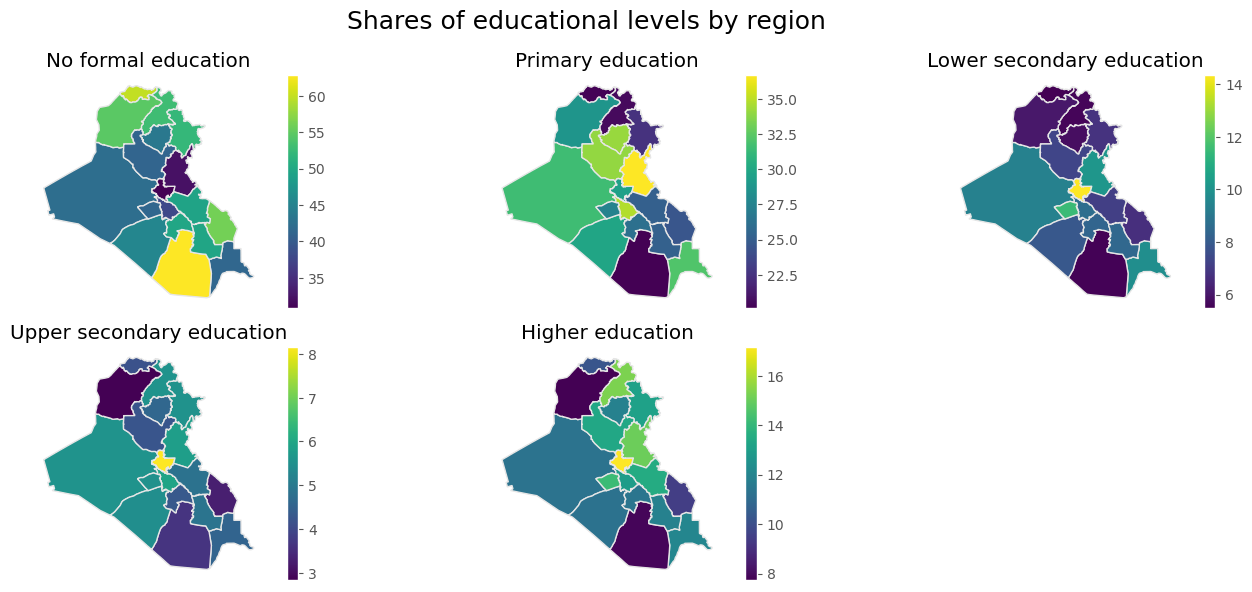

In [35]:
fig = plt.figure(figsize=(14,6))

fig.suptitle('Shares of educational levels by region', fontsize=18)

ax1 = fig.add_subplot(2, 3, 1)
df_merged.plot(column='no education', cmap='viridis', linewidth=1, ax=ax1, edgecolor='0.9', legend=True)
ax1.set_title('No formal education')
ax1.axis('off')

ax2 = fig.add_subplot(2, 3, 2)
df_merged.plot(column='primary', cmap='viridis', linewidth=1, ax=ax2, edgecolor='0.9', legend=True)
ax2.set_title('Primary education')
ax2.axis('off')

ax3 = fig.add_subplot(2, 3, 3)
df_merged.plot(column='lower secondary', cmap='viridis', linewidth=1, ax=ax3, edgecolor='0.9', legend=True)
ax3.set_title('Lower secondary education')
ax3.axis('off')

ax4 = fig.add_subplot(2, 3, 4)
df_merged.plot(column='upper secondary', cmap='viridis', linewidth=1, ax=ax4, edgecolor='0.9', legend=True)
ax4.set_title('Upper secondary education')
ax4.axis('off')

ax5 = fig.add_subplot(2, 3, 5)
df_merged.plot(column='higher', cmap='viridis', linewidth=1, ax=ax5, edgecolor='0.9', legend=True)
ax5.set_title('Higher education')
ax5.axis('off')

plt.tight_layout()
plt.savefig('fig7_educational_attainment_regional.png')

### 2. Reasons for no/low education

#### Reasons: total and by gender

In [36]:
# relative frequencies: total

ihses['total'] = 'total'

pct_reason_total = pd.crosstab(index=ihses['total'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_total

reason,Could not afford school,Early marriage,Education is not useful,Going to school is hazardous,Have to work,Household chores,No accessible school in neighbourhood,Not interested to go to school,Other,Sickness or disability,Social reasons
total,,,,,,,,,,,
total,6.945222,4.333305,1.320225,1.62778,21.567429,3.905901,8.819391,20.05978,3.940506,1.895658,25.584803


In [37]:
# relative frequencies: by gender

pct_reason_gender = pd.crosstab(index=ihses['gender'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_gender

reason,Could not afford school,Early marriage,Education is not useful,Going to school is hazardous,Have to work,Household chores,No accessible school in neighbourhood,Not interested to go to school,Other,Sickness or disability,Social reasons
gender,,,,,,,,,,,
female,5.637786,7.861784,1.518933,1.422239,0.923583,6.748864,10.639340,14.639231,2.285035,1.435504,46.887700
male,8.511690,0.105760,1.082149,1.874043,46.301257,0.499687,6.638872,26.554253,5.923961,2.446977,0.061351


In [38]:
# concatenate aggregate tables

pct_reason = pd.concat([pct_reason_total, pct_reason_gender])

pct_reason = pct_reason.sort_values('total', axis=1, ascending=False)

pct_reason

reason,Social reasons,Have to work,Not interested to go to school,No accessible school in neighbourhood,Could not afford school,Early marriage,Other,Household chores,Sickness or disability,Going to school is hazardous,Education is not useful
total,25.584803,21.567429,20.059780,8.819391,6.945222,4.333305,3.940506,3.905901,1.895658,1.627780,1.320225
female,46.887700,0.923583,14.639231,10.639340,5.637786,7.861784,2.285035,6.748864,1.435504,1.422239,1.518933
male,0.061351,46.301257,26.554253,6.638872,8.511690,0.105760,5.923961,0.499687,2.446977,1.874043,1.082149


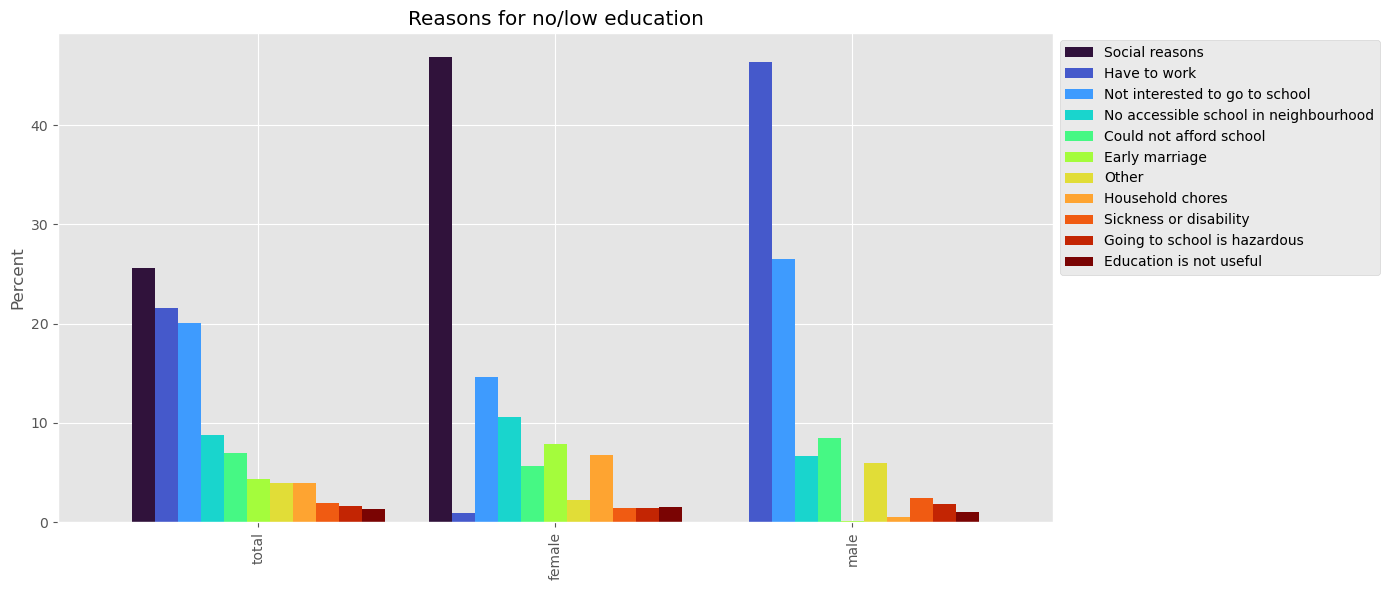

In [39]:
# figure: total and by gender
fig = pct_reason.plot(kind='bar', colormap='turbo', figsize=(14,6), width=.85)
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_ylabel('Percent')
fig.set_title('Reasons for no/low education')

plt.tight_layout()
plt.savefig('fig8_reasons_total.png')

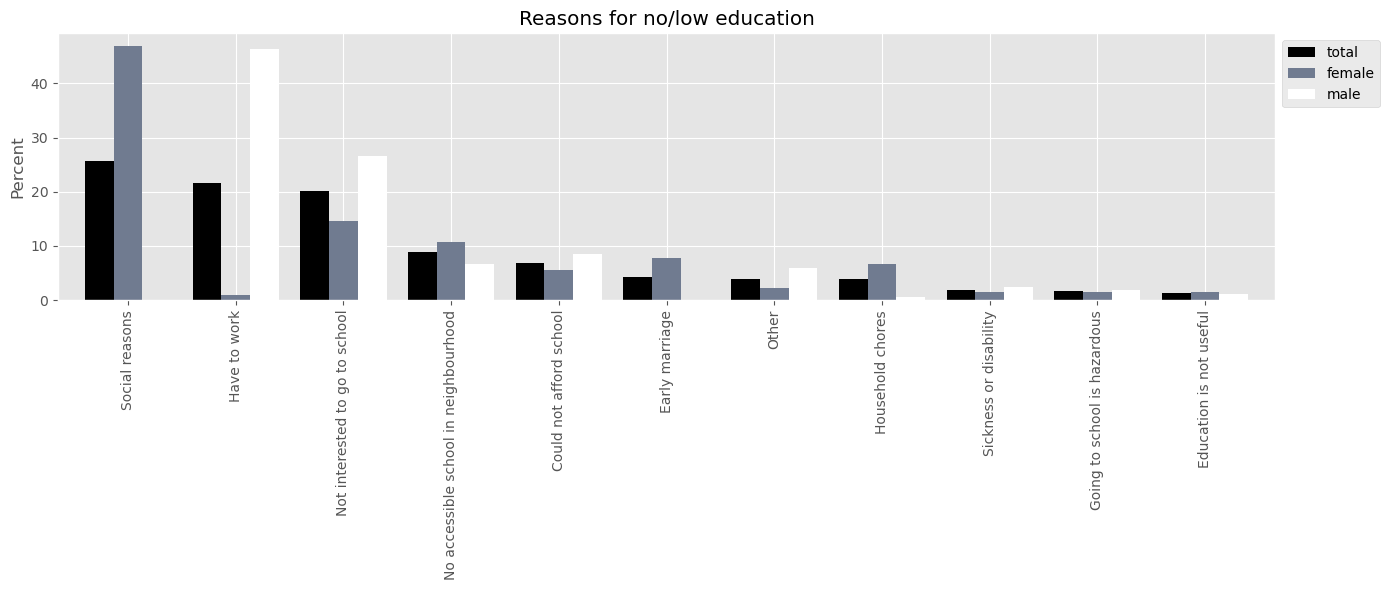

In [40]:
# alternative figure
pct_reason_t = pct_reason.transpose()

fig = pct_reason_t.plot(kind='bar', colormap='bone', figsize=(14,6), width=.8)
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_xlabel('')
fig.set_ylabel('Percent')
fig.set_title('Reasons for no/low education')

plt.tight_layout()
plt.savefig('fig8_reasons_total_t.png')

#### Reasons by birthyear (3 year groups)

In [41]:
# relative frequencies by birth year (3 year groups)

pct_reason_age = pd.crosstab(index=ihses['byear3'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_age = pct_reason_age.reindex(['Social reasons', 'Have to work', 'Not interested to go to school', 
                               'No accessible school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other', 'Sickness or disability', 'Going to school is hazardous', 
                               'Education is not useful'], axis=1)

pct_reason_age

reason,Social reasons,Have to work,Not interested to go to school,No accessible school in neighbourhood,Could not afford school,Early marriage,Household chores,Other,Sickness or disability,Going to school is hazardous,Education is not useful
byear3,,,,,,,,,,,
1947,27.508048,22.609805,7.441249,24.791535,2.594568,5.483126,2.677974,3.896877,0.868683,0.736159,1.391977
1950,25.864561,22.841178,10.848353,20.970759,4.011606,4.220163,3.284784,4.398671,0.731710,0.726025,2.102191
1953,27.676014,23.730730,9.780692,18.348480,5.311880,4.879315,3.406236,4.133511,0.532745,1.326376,0.874021
1956,28.992716,24.994848,9.392375,14.387745,5.155208,5.304793,2.623181,4.707622,1.407237,1.496541,1.537735
1959,31.376529,21.733767,11.533098,12.269438,5.864611,4.836967,4.856233,4.133421,0.679694,1.026060,1.690182
1962,31.690753,21.869151,13.095821,10.604956,4.420798,6.063332,3.963938,4.894999,0.624171,1.411998,1.360083
1965,26.801413,24.855310,13.334760,10.295220,4.915077,5.566842,3.954635,4.593310,1.647960,2.124758,1.910716
1968,25.514866,25.684491,14.095336,8.496376,6.429576,4.609144,4.556905,6.243893,1.175109,1.906590,1.287712
1971,27.067157,25.814091,15.544634,7.508310,6.633502,4.562238,3.833590,3.986761,1.336888,2.196037,1.516791


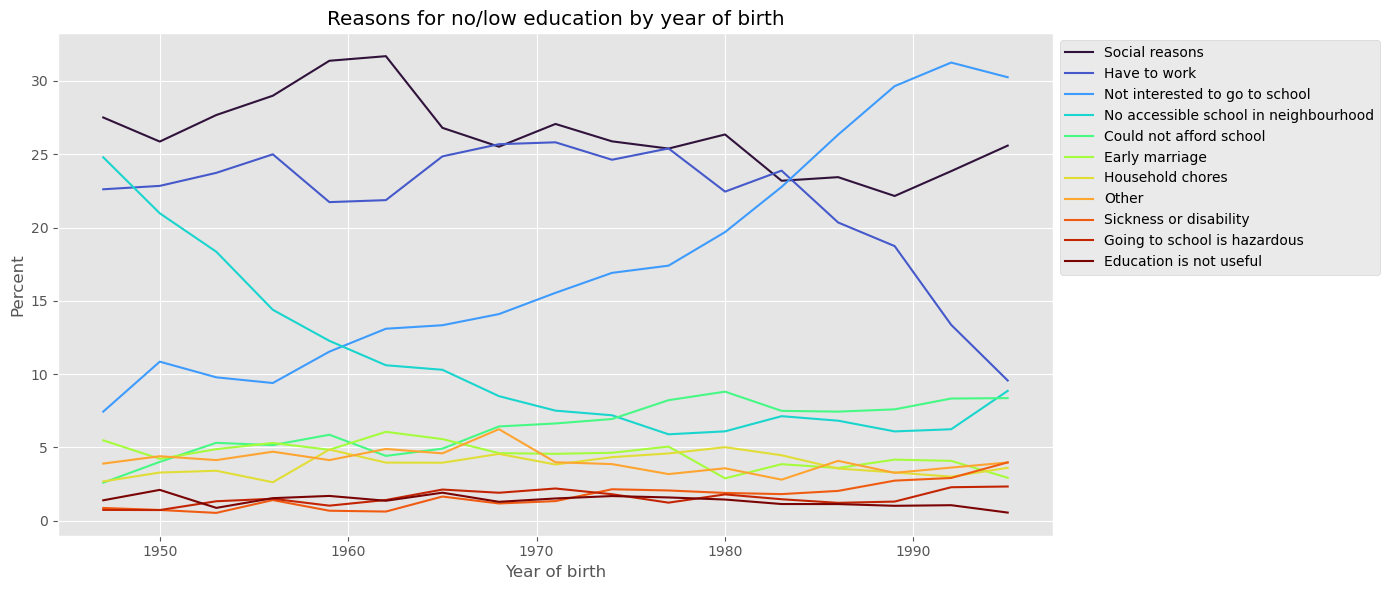

In [42]:
# figure by birthyear
fig = pct_reason_age.plot(colormap='turbo', figsize=(14,6))
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_ylabel('Percent')
fig.set_xlabel('Year of birth')
fig.set_title('Reasons for no/low education by year of birth')

plt.tight_layout()
plt.savefig('fig9_reasons_birthyear.png')

#### Reasons by educational level

In [43]:
# code lower and upper secondary education as one category because of case numbers
ihses['edulevel2'] = ihses['edulevel']
ihses.loc[ihses['edulevel']=='lower secondary', 'edulevel2'] = 'secondary'
ihses.loc[ihses['edulevel']=='upper secondary', 'edulevel2'] = 'secondary'
ihses['edulevel2'].value_counts()

no education    41273
primary         22490
secondary        9233
higher           8085
Name: edulevel2, dtype: int64

In [44]:
# relative frequencies by educational level

pct_reason_edu = pd.crosstab(index=ihses['edulevel2'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_edu = pct_reason_edu.reindex(['Social reasons', 'Have to work', 'Not interested to go to school', 
                               'No accessible school in neighbourhood', 'Could not afford school', 'Early marriage',
                               'Household chores', 'Other', 'Sickness or disability', 'Going to school is hazardous', 
                               'Education is not useful'], axis=1)

pct_reason_edu

reason,Social reasons,Have to work,Not interested to go to school,No accessible school in neighbourhood,Could not afford school,Early marriage,Household chores,Other,Sickness or disability,Going to school is hazardous,Education is not useful
edulevel2,,,,,,,,,,,
no education,30.720450,14.714724,18.705602,13.771133,7.179486,1.922941,4.222728,2.714220,2.924944,1.403872,1.719900
primary,23.298434,25.573701,23.222515,5.055193,7.227350,4.562499,3.825605,3.790964,0.917369,1.601597,0.924774
secondary,15.222118,33.785726,17.701089,1.689253,5.667219,10.945268,3.127791,7.824668,0.794956,2.309165,0.932746


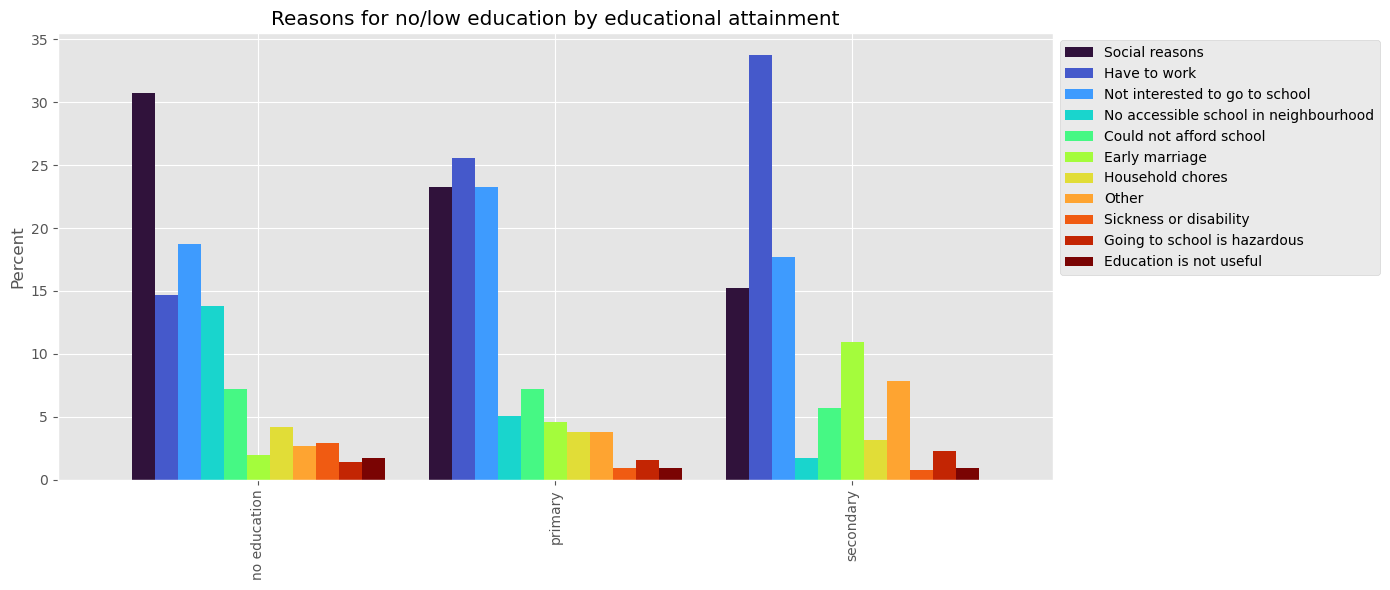

In [45]:
# figure: reasons by educational level
fig = pct_reason_edu.plot(kind='bar', colormap='turbo', figsize=(14,6), width=.85)
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_xlabel('')
fig.set_ylabel('Percent')
fig.set_title('Reasons for no/low education by educational attainment')

plt.tight_layout()
plt.savefig('fig10_reasons_edu.png')

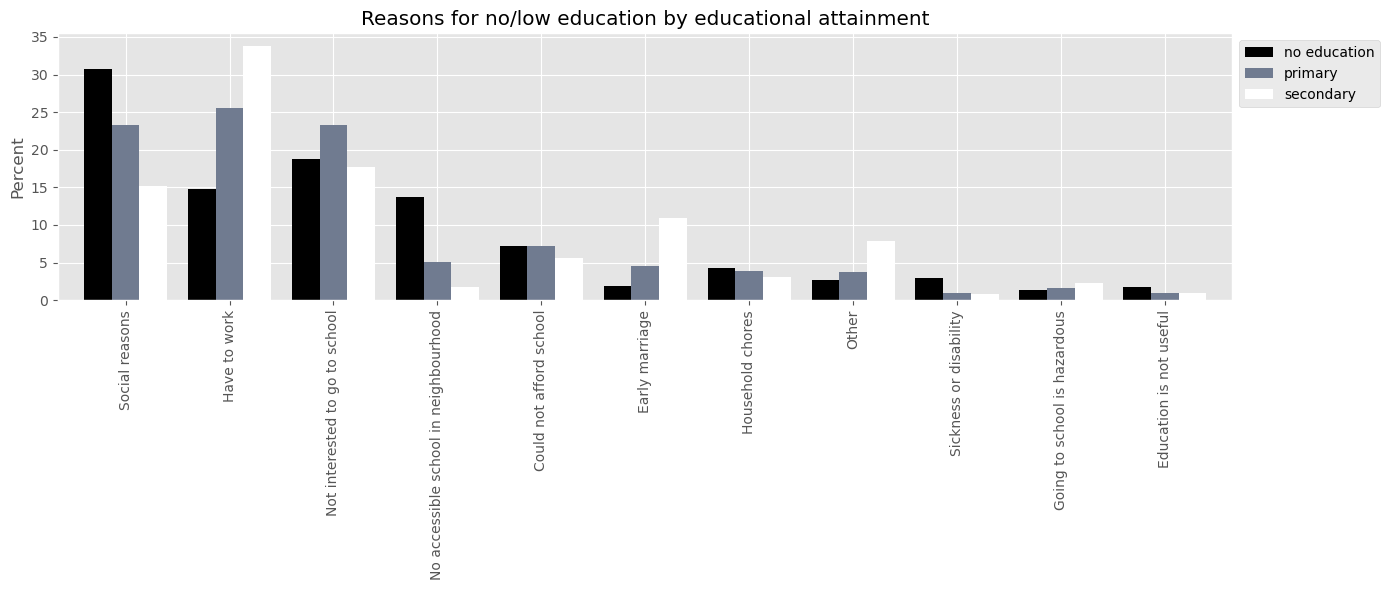

In [46]:
# alternative figure
pct_reason_edu_t = pct_reason_edu.transpose()

fig = pct_reason_edu_t.plot(kind='bar', colormap='bone', figsize=(14,6), width=.8)
fig.legend(bbox_to_anchor=(1, 1), loc=2)
fig.set_xlabel('')
fig.set_ylabel('Percent')
fig.set_title('Reasons for no/low education by educational attainment')

plt.tight_layout()
plt.savefig('fig10_reasons_edu_t.png')

#### Reasons by region

In [47]:
# relative frequencies by region
pct_reason_region = pd.crosstab(index=ihses['region'], columns=ihses['reason'], 
                            values=ihses['weight_x'], aggfunc=sum, normalize='index')*100

pct_reason_region.reset_index(inplace=True)

In [48]:
pct_reason_region['pcode'] = pcode

pct_reason_region

reason,region,Could not afford school,Early marriage,Education is not useful,Going to school is hazardous,Have to work,Household chores,No accessible school in neighbourhood,Not interested to go to school,Other,Sickness or disability,Social reasons,pcode
0,Anbar,3.031143,2.210580,1.060161,0.300520,25.292007,0.954346,12.650066,15.459910,1.486256,1.848046,35.706966,IQG01
1,Babylon,5.066459,4.802539,0.662878,1.168325,24.717642,0.953185,8.816295,17.000966,3.994853,1.750404,31.066452,IQG07
2,Baghdad,5.189251,6.893119,1.832251,1.630222,26.303433,4.021113,3.316071,18.803043,3.181077,1.893754,26.936666,IQG08
3,Basrah,17.750894,5.163426,0.488552,2.354728,10.923405,3.119948,5.592249,26.749744,2.762598,1.988718,23.105738,IQG02
4,Diyala,7.114165,6.430503,3.475401,0.890686,26.507754,5.876859,6.522486,27.091375,2.383179,1.970085,11.737506,IQG10
5,Duhok,6.238785,2.424251,2.379490,6.283125,10.857923,7.756400,16.694997,25.046950,7.095805,2.329486,12.892788,IQG09
6,Erbil,6.098424,2.536334,3.160475,4.568399,19.947749,4.947925,9.978027,22.244083,6.450828,1.504831,18.562925,IQG11
7,Kerbela,10.609026,5.094641,0.805391,0.837896,22.323044,4.487361,8.746653,13.159490,3.372463,2.081497,28.482537,IQG12
8,Kirkuk,4.215412,2.198107,0.223692,0.934688,22.457563,1.836641,2.919571,24.743973,4.638984,1.683948,34.147421,IQG13
9,Maysan,7.183345,3.299223,0.763494,0.615730,27.461797,8.750216,8.405036,13.851652,1.968836,1.542384,26.158287,IQG14


In [89]:
#merge dataframes
df_merged = map_df.merge(pct_reason_region, left_on=['ADM1_PCODE'], right_on=['pcode'])

In [90]:
df_merged.head()

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_AR,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM1ALT1AR,ADM1ALT2AR,...,Education is not useful,Going to school is hazardous,Have to work,Household chores,No accessible school in neighbourhood,Not interested to go to school,Other,Sickness or disability,Social reasons,pcode
0,17.090203,11.953673,Al-Anbar,الانبار,IQG01,NaN,NaN,NaN,NaN,NaN,...,1.060161,0.300520,25.292007,0.954346,12.650066,15.459910,1.486256,1.848046,35.706966,IQG01
1,8.057029,1.774143,Al-Basrah,البصرة,IQG02,NaN,NaN,NaN,NaN,NaN,...,0.488552,2.354728,10.923405,3.119948,5.592249,26.749744,2.762598,1.988718,23.105738,IQG02
2,10.084730,4.838574,Al-Muthanna,المثنى,IQG03,NaN,NaN,NaN,NaN,NaN,...,0.561906,0.515286,21.933792,1.095557,12.434138,11.375148,2.200870,1.891232,38.619560,IQG03
3,8.959419,3.797184,Al-Najaf,النجف,IQG04,NaN,NaN,NaN,NaN,NaN,...,0.898958,0.795128,21.129089,2.299160,9.555102,21.894295,6.034681,2.128170,20.973409,IQG04
4,4.772678,0.808105,Al-Qadissiya,القادسية,IQG05,NaN,NaN,NaN,NaN,NaN,...,0.159192,0.839670,17.212018,2.264482,15.836378,17.210077,3.408693,2.714102,23.883730,IQG05


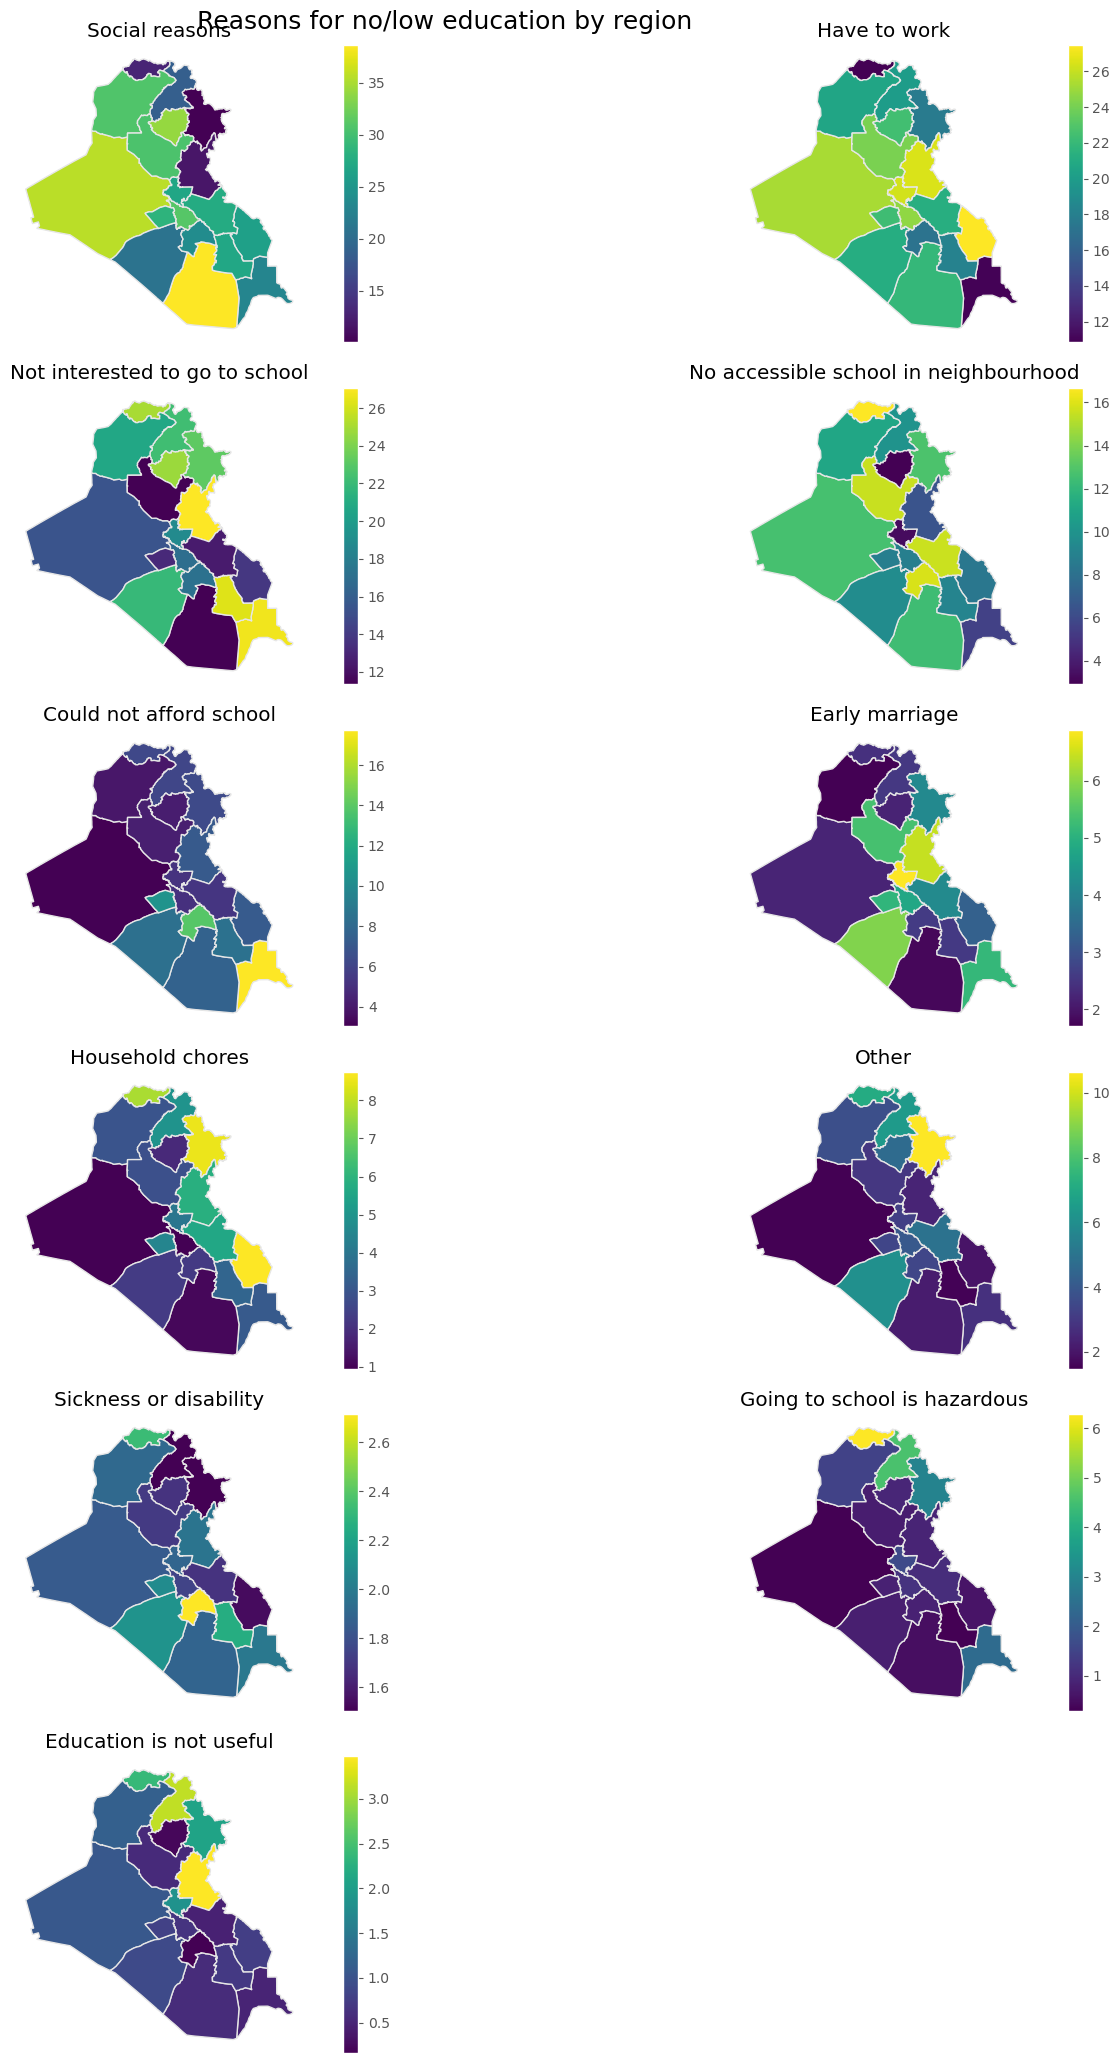

In [91]:
fig = plt.figure(figsize=(15,21))

fig.suptitle('Reasons for no/low education by region', fontsize=18)
            
ax1 = fig.add_subplot(6, 2, 1)
df_merged.plot(column='Social reasons', cmap='viridis', linewidth=1, ax=ax1, edgecolor='0.9', legend=True)
ax1.set_title('Social reasons')
ax1.axis('off')

ax2 = fig.add_subplot(6, 2, 2)
df_merged.plot(column='Have to work', cmap='viridis', linewidth=1, ax=ax2, edgecolor='0.9', legend=True)
ax2.set_title('Have to work')
ax2.axis('off')

ax3 = fig.add_subplot(6, 2, 3)
df_merged.plot(column='Not interested to go to school', cmap='viridis', linewidth=1, ax=ax3, edgecolor='0.9', legend=True)
ax3.set_title('Not interested to go to school')
ax3.axis('off')

ax4 = fig.add_subplot(6, 2, 4)
df_merged.plot(column='No accessible school in neighbourhood', cmap='viridis', linewidth=1, ax=ax4, edgecolor='0.9', legend=True)
ax4.set_title('No accessible school in neighbourhood')
ax4.axis('off')

ax5 = fig.add_subplot(6, 2, 5)
df_merged.plot(column='Could not afford school', cmap='viridis', linewidth=1, ax=ax5, edgecolor='0.9', legend=True)
ax5.set_title('Could not afford school')
ax5.axis('off')

ax6 = fig.add_subplot(6, 2, 6)
df_merged.plot(column='Early marriage', cmap='viridis', linewidth=1, ax=ax6, edgecolor='0.9', legend=True)
ax6.set_title('Early marriage')
ax6.axis('off')

ax7 = fig.add_subplot(6, 2, 7)
df_merged.plot(column='Household chores', cmap='viridis', linewidth=1, ax=ax7, edgecolor='0.9', legend=True)
ax7.set_title('Household chores')
ax7.axis('off')

ax8 = fig.add_subplot(6, 2, 8)
df_merged.plot(column='Other', cmap='viridis', linewidth=1, ax=ax8, edgecolor='0.9', legend=True)
ax8.set_title('Other')
ax8.axis('off')

ax9 = fig.add_subplot(6, 2, 9)
df_merged.plot(column='Sickness or disability', cmap='viridis', linewidth=1, ax=ax9, edgecolor='0.9', legend=True)
ax9.set_title('Sickness or disability')
ax9.axis('off')

ax10 = fig.add_subplot(6, 2, 10)
df_merged.plot(column='Going to school is hazardous', cmap='viridis', linewidth=1, ax=ax10, edgecolor='0.9', legend=True)
ax10.set_title('Going to school is hazardous')
ax10.axis('off')

ax11 = fig.add_subplot(6, 2, 11)
df_merged.plot(column='Education is not useful', cmap='viridis', linewidth=1, ax=ax11, edgecolor='0.9', legend=True)
ax11.set_title('Education is not useful')
ax11.axis('off')

plt.tight_layout()
plt.savefig('figx_reasons_regional.png')